In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 1.7 MB 65.3 MB/s 
     |████████████████████████████████| 5.9 MB 59.3 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Mon Nov  7 11:36:18 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import sklearn
import os
import seaborn as sns
from google.colab.patches import cv2_imshow
import glob

In [ ]:
 batch_size=16

In [ ]:
train_path="/content/drive/MyDrive/Capstone_data/train"
test_path="/content/drive/MyDrive/Capstone_data/test"
val_path="/content/drive/MyDrive/Capstone_data/val"

In [ ]:
train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

val_normal = glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia = glob.glob(val_path+"/PNEUMONIA/*.jpeg")

In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])

df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]

In [ ]:
df_train.head()

class                                              image
0  Normal  /content/drive/MyDrive/Capstone_data/train/NOR...
1  Normal  /content/drive/MyDrive/Capstone_data/train/NOR...
2  Normal  /content/drive/MyDrive/Capstone_data/train/NOR...
3  Normal  /content/drive/MyDrive/Capstone_data/train/NOR...
4  Normal  /content/drive/MyDrive/Capstone_data/train/NOR...

In [ ]:
df_test.head()

class                                              image
0  Normal  /content/drive/MyDrive/Capstone_data/test/NORM...
1  Normal  /content/drive/MyDrive/Capstone_data/test/NORM...
2  Normal  /content/drive/MyDrive/Capstone_data/test/NORM...
3  Normal  /content/drive/MyDrive/Capstone_data/test/NORM...
4  Normal  /content/drive/MyDrive/Capstone_data/test/NORM...

In [ ]:
df_val.head()

class                                              image
0  Normal  /content/drive/MyDrive/Capstone_data/val/NORMA...
1  Normal  /content/drive/MyDrive/Capstone_data/val/NORMA...
2  Normal  /content/drive/MyDrive/Capstone_data/val/NORMA...
3  Normal  /content/drive/MyDrive/Capstone_data/val/NORMA...
4  Normal  /content/drive/MyDrive/Capstone_data/val/NORMA...

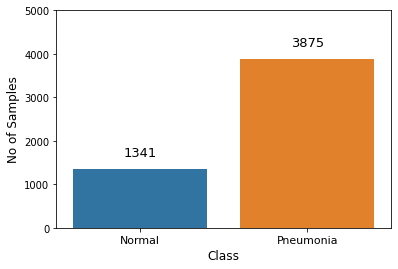

In [ ]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train)

plt.xlabel("Class", fontsize= 12)
plt.ylabel("No of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)
    
plt.show()

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
img = cv2.imread("123.jpeg", 0)
clahe = cv2.createCLAHE (clipLimit=3.0, tileGridSize=(8,8)) 
cl_img=clahe.apply(img)
plt.hist (cl_img. flat, bins=100, range=(0,255)) 
cv2_imshow(cl_img)

AttributeError: ignored

In [ ]:
cv_img = []
i=1
for img in train_normal:
  img = cv2.imread(img, 0)
  clahe = cv2.createCLAHE (clipLimit=3.0, tileGridSize=(8,8)) 
  cl_img=clahe.apply(img)
  Ak=cv2.imwrite("/content/drive/MyDrive/Capstone_data/Clahe_train/normal/"+str(i)+".jpeg",cl_img)
  i+=1

In [ ]:
i=1
for img in train_pneumonia:
  img = cv2.imread(img, 0)
  clahe = cv2.createCLAHE (clipLimit=3.0, tileGridSize=(8,8)) 
  cl_img=clahe.apply(img)
  Ak=cv2.imwrite("/content/drive/MyDrive/Capstone_data/Clahe_train/pneumonia/"+str(i)+".jpeg",cl_img)
  i+=1

In [ ]:
i=1
for img in test_normal:
  img = cv2.imread(img, 0)
  clahe = cv2.createCLAHE (clipLimit=3.0, tileGridSize=(8,8)) 
  cl_img=clahe.apply(img)
  Ak=cv2.imwrite("/content/drive/MyDrive/Capstone_data/Clahe_test/normal/"+str(i)+".jpeg",cl_img)
  i+=1

In [ ]:
i=1
for img in test_pneumonia:
  img = cv2.imread(img, 0)
  clahe = cv2.createCLAHE (clipLimit=3.0, tileGridSize=(8,8)) 
  cl_img=clahe.apply(img)
  Ak=cv2.imwrite("/content/drive/MyDrive/Capstone_data/Clahe_test/pneumonia/"+str(i)+".jpeg",cl_img)
  i+=1

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array

train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.4,
        zoom_range=0.3,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
i=1
for img in val_normal:
  img = cv2.imread(img, 0)
  clahe = cv2.createCLAHE (clipLimit=3.0, tileGridSize=(8,8)) 
  cl_img=clahe.apply(img)
  Ak=cv2.imwrite("/content/drive/MyDrive/Capstone_data/Clahe_val/normal/"+str(i)+".jpeg",cl_img)
  i+=1

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
i=1
img = cv2.imread('1.jpeg')
image_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE (clipLimit=3.0, tileGridSize=(8,8)) 
cl_img=clahe.apply(image_bw)

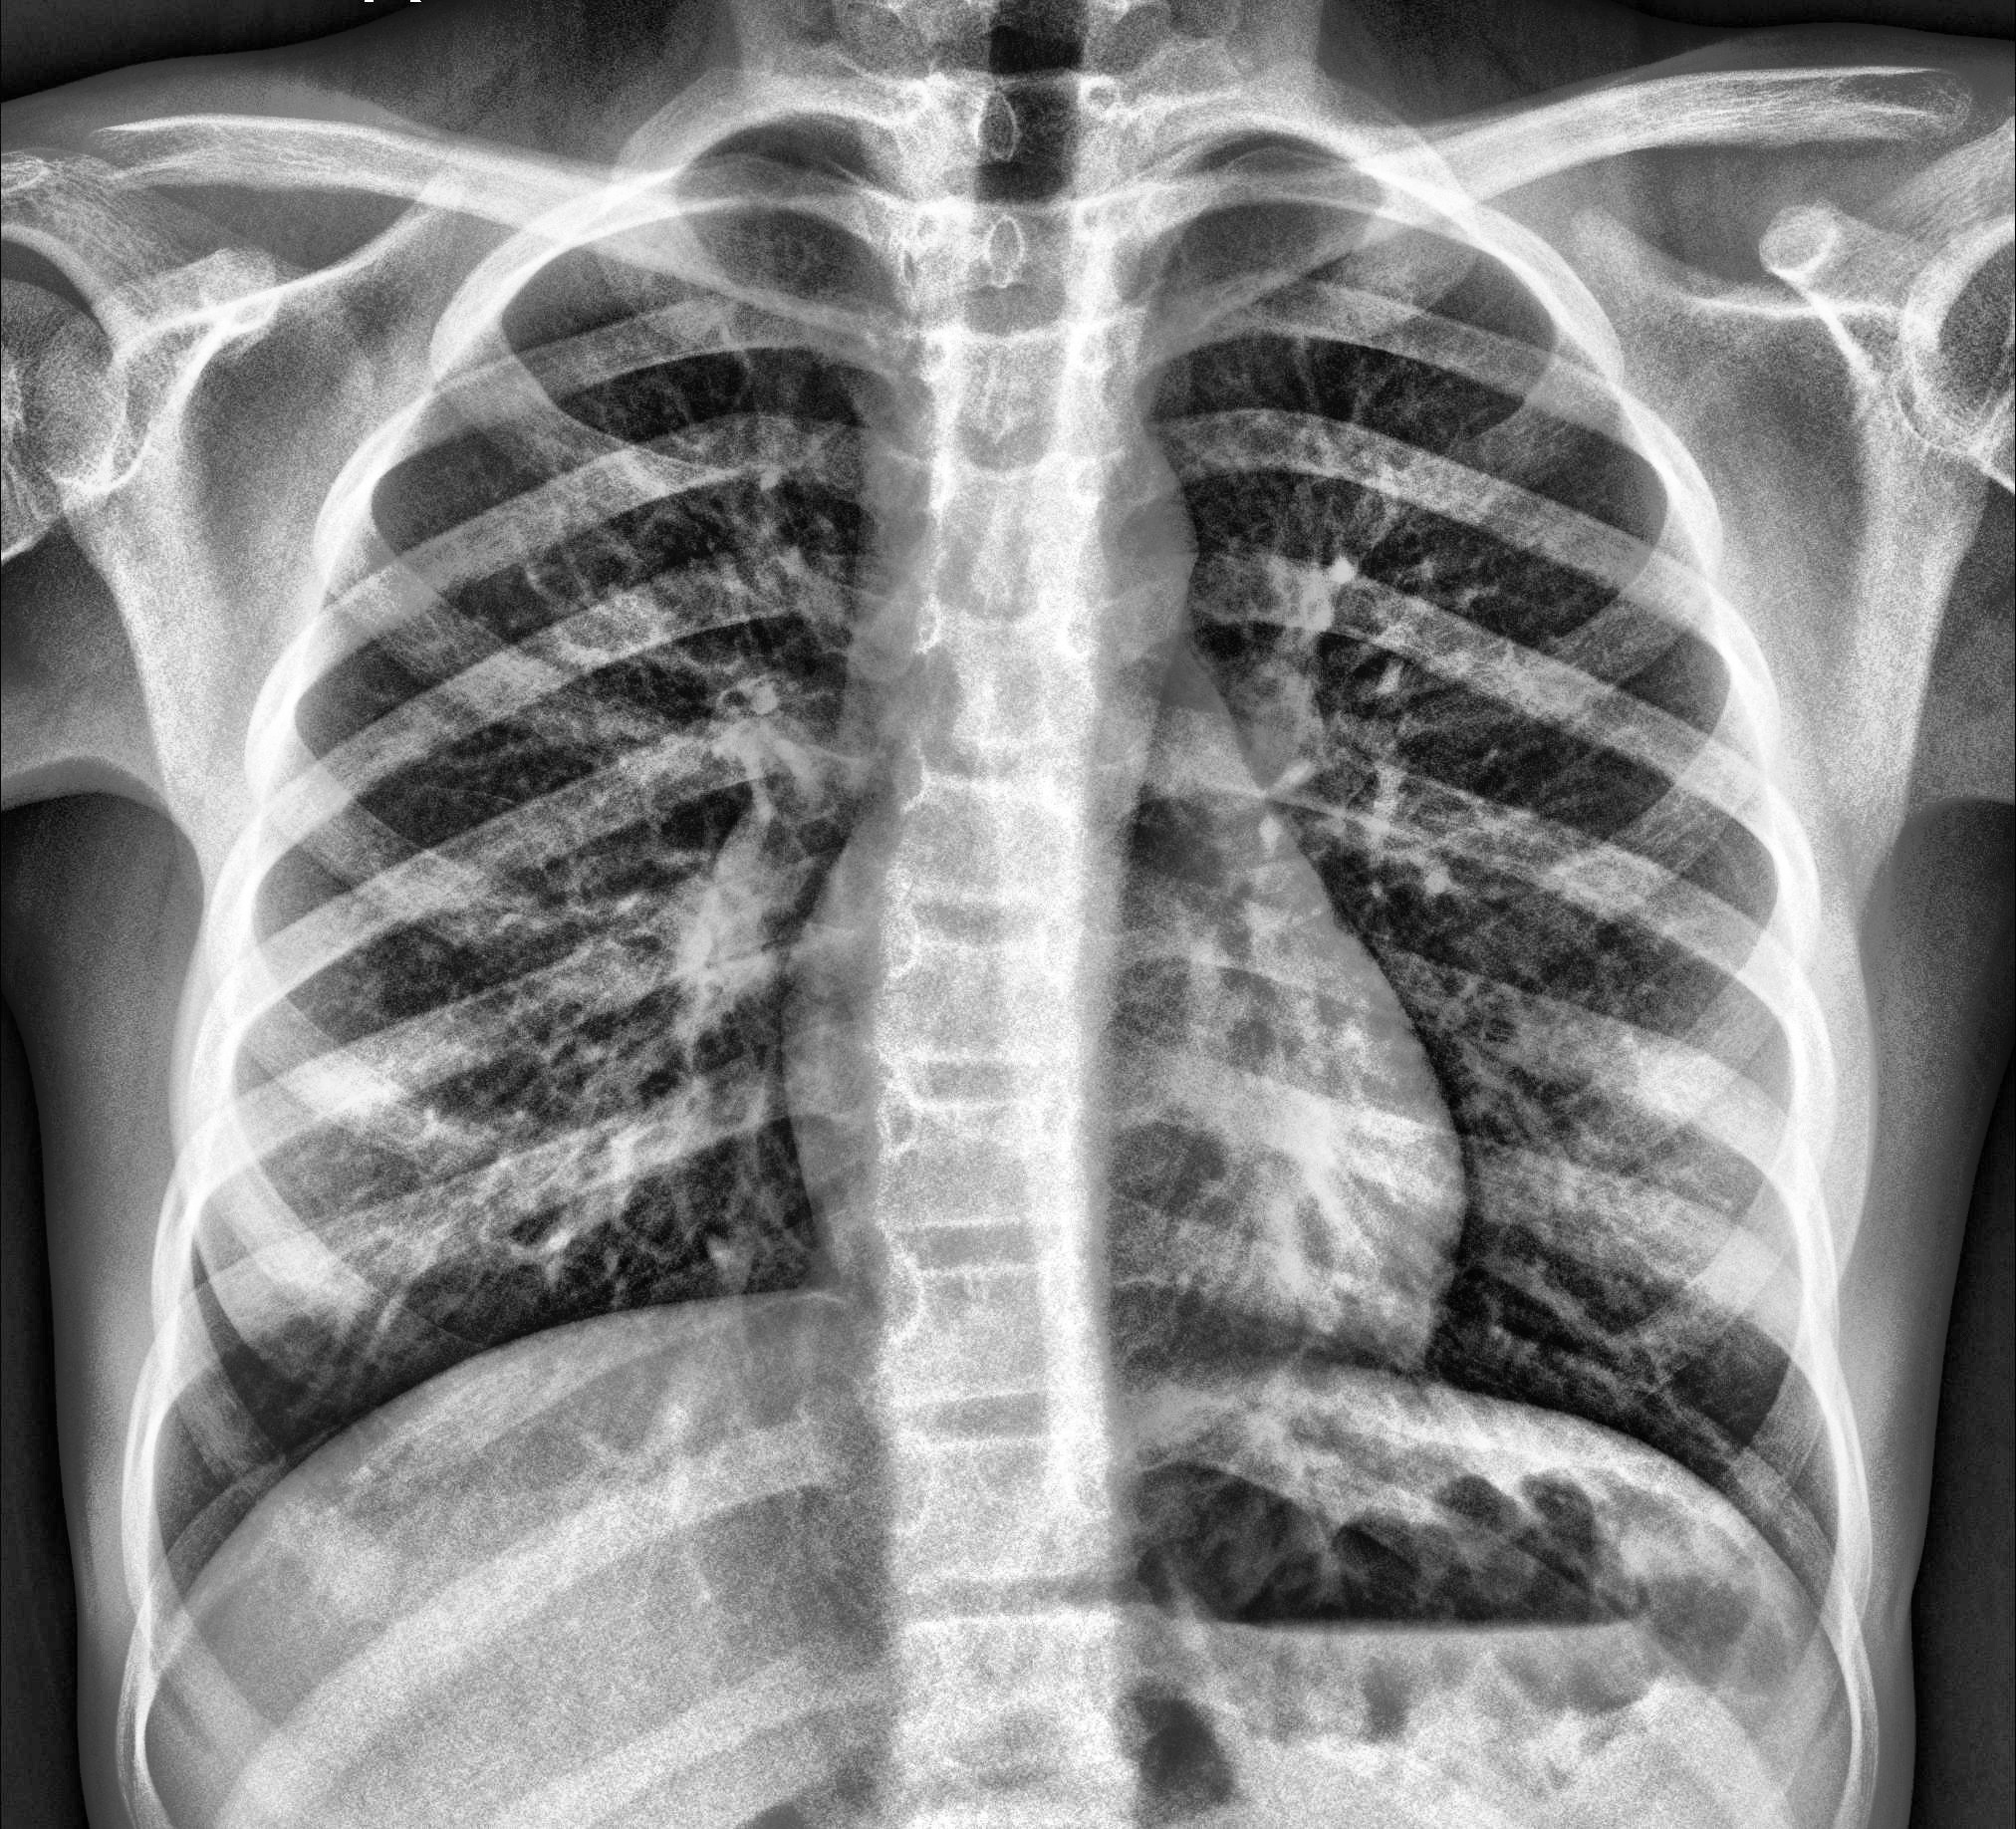

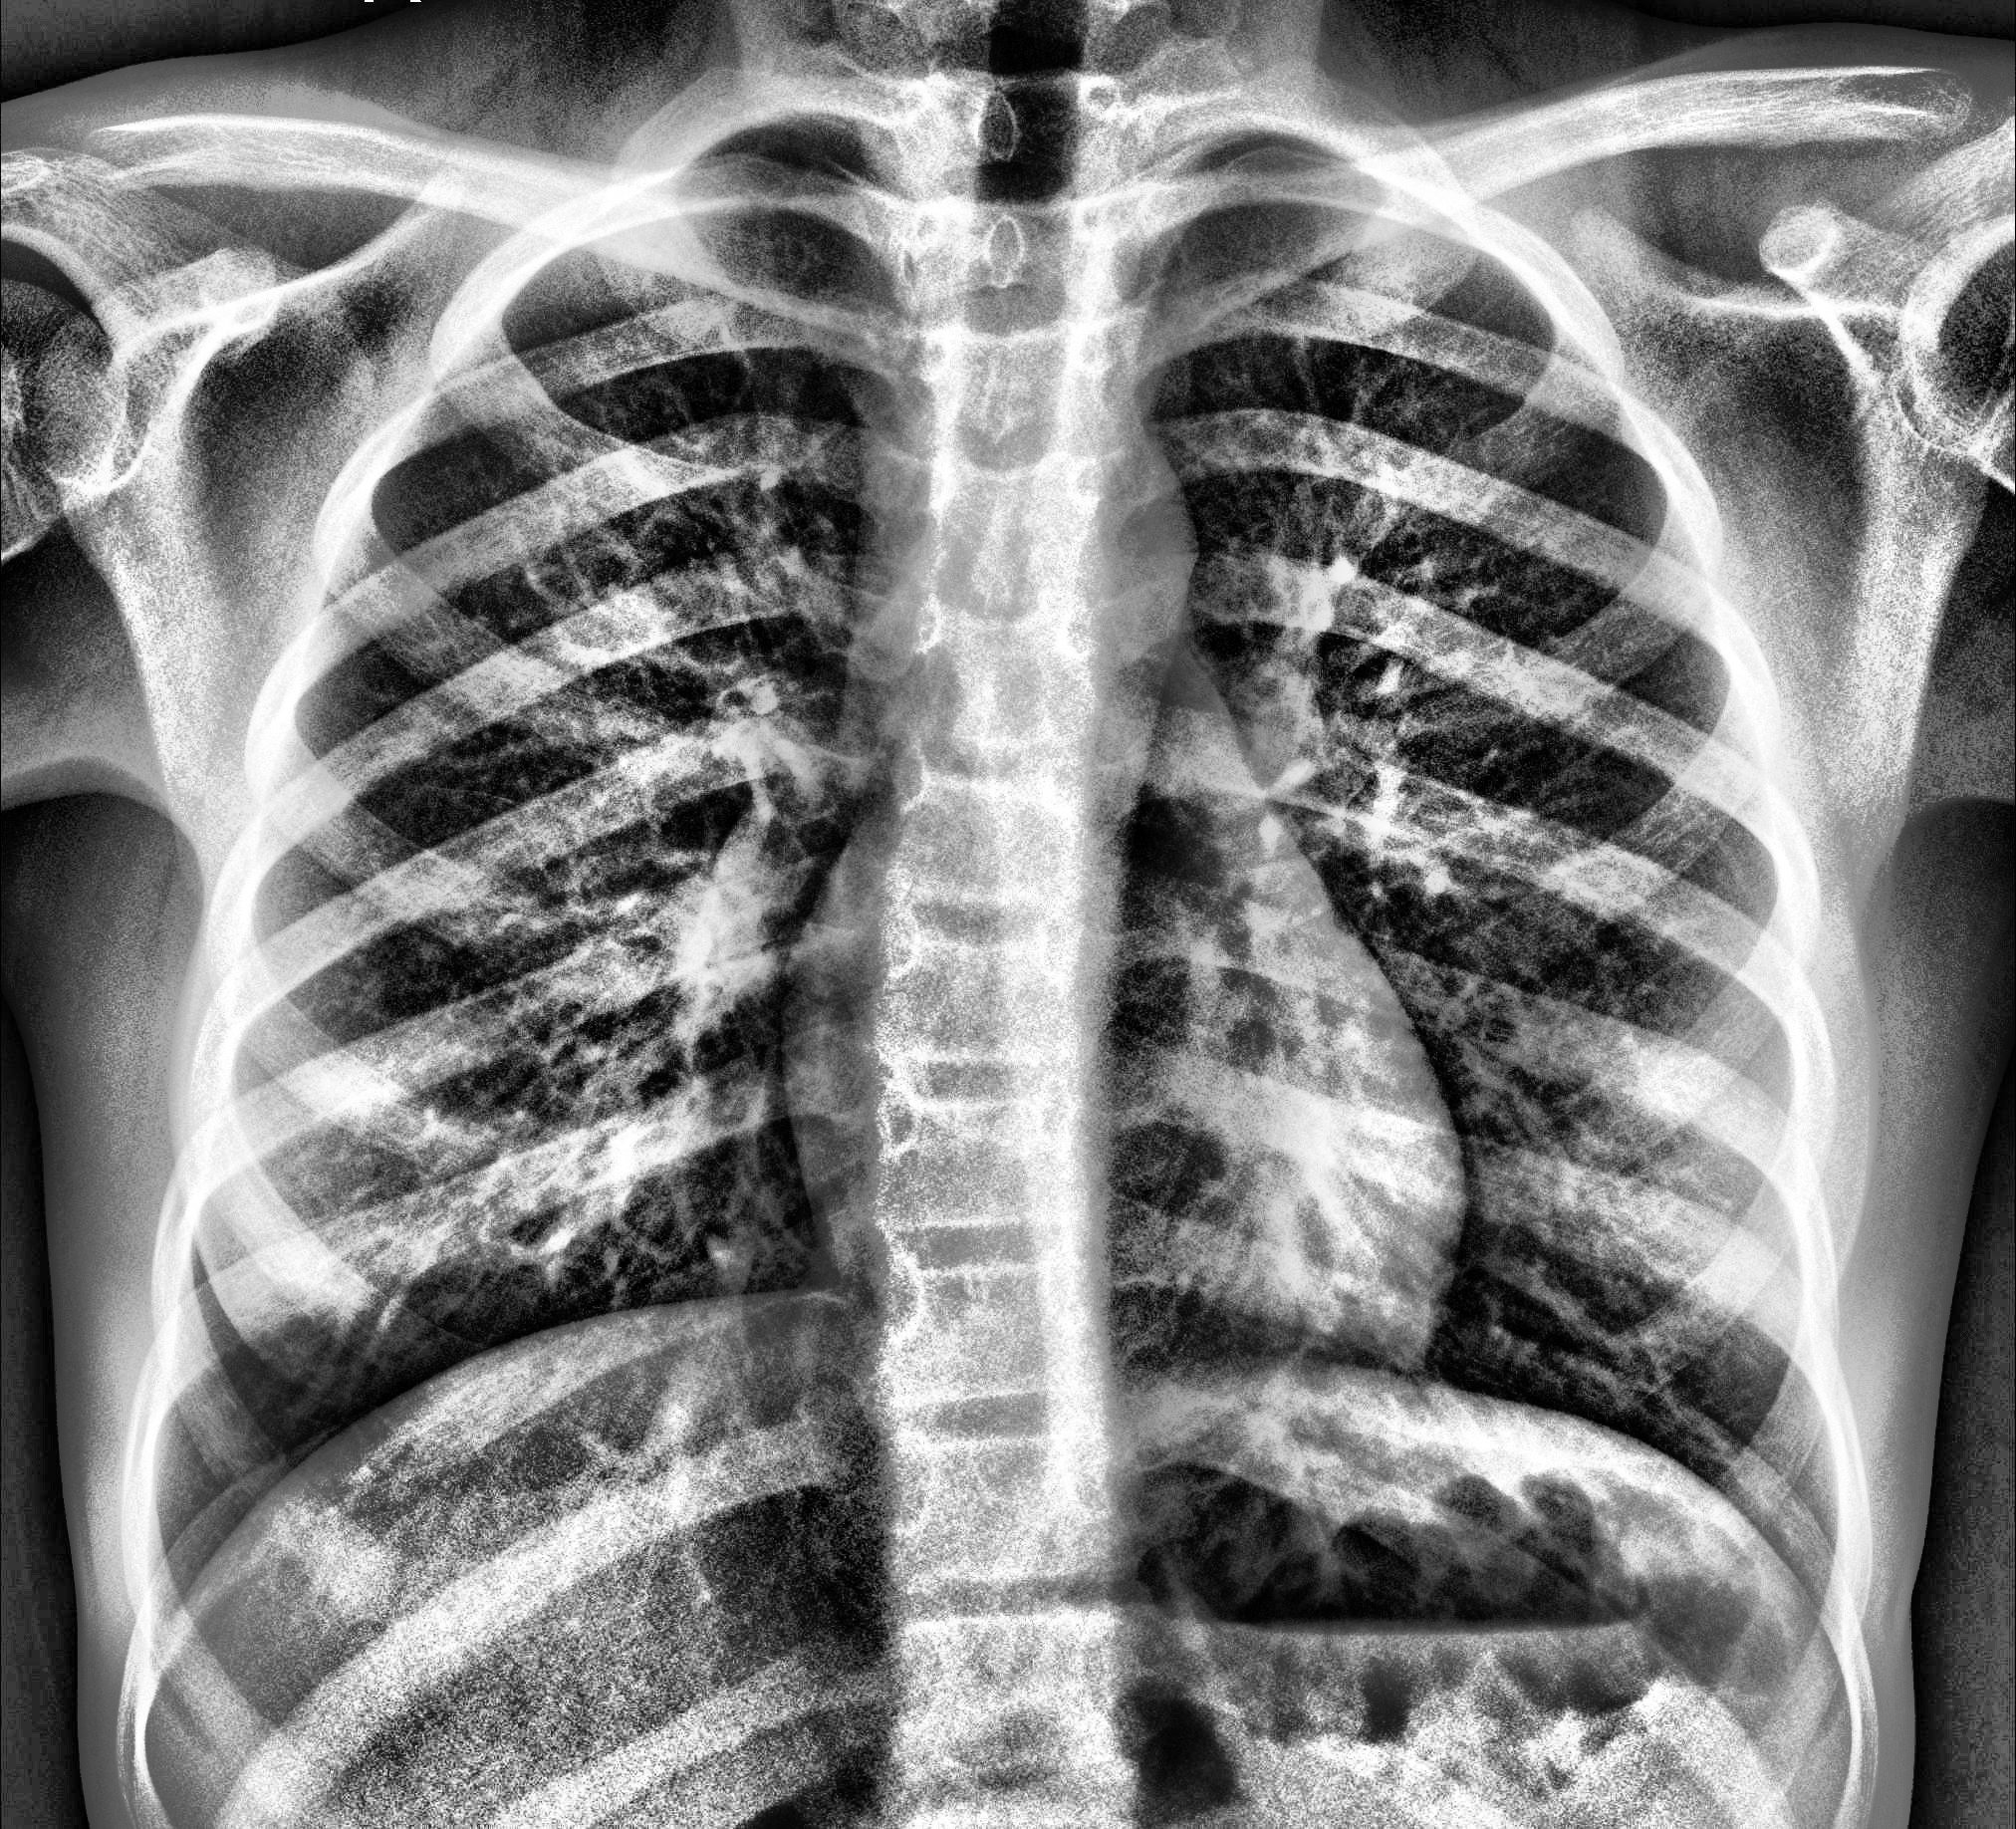

In [ ]:
cv2_imshow(img)
cv2_imshow(cl_img)